In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./log.txt', header = None, sep = '\t')
df.head()

,0,1,2,3,4,5,6,7,8
0,2019162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2018-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2018-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2018-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2018-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2018-11-01 00:04:07


In [3]:
df.columns = ['id', 'api', 'count', 'res_time_sum', 'res_time_min', 'res_time_max', 'res_time_avg', 'interval', 'created_at']

In [4]:
df.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,2019162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2018-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2018-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2018-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2018-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2018-11-01 00:04:07


In [11]:
df.shape

(179496, 9)

In [14]:
df.dtypes

id                int64
api              object
count             int64
res_time_sum    float64
res_time_min    float64
res_time_max    float64
res_time_avg    float64
interval          int64
created_at       object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179496 entries, 0 to 179495
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            179496 non-null  int64  
 1   api           179496 non-null  object 
 2   count         179496 non-null  int64  
 3   res_time_sum  179496 non-null  float64
 4   res_time_min  179496 non-null  float64
 5   res_time_max  179496 non-null  float64
 6   res_time_avg  179496 non-null  float64
 7   interval      179496 non-null  int64  
 8   created_at    179496 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 12.3+ MB


#### 检测是否有重复值

In [17]:
df['api'].describe()

count                     179496
unique                         1
top       /front-api/bill/create
freq                      179496
Name: api, dtype: object

#### 检测是否有重复值

In [8]:
new_df = df.drop_duplicates()
print(str(len(df))+"=="+str(len(new_df)))
print("There is no duplicates")

179496==179496
There is no duplicates


In [18]:
df = df.drop('api',axis = 1)
df.head()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,2019162542,8,1057.31,88.75,177.72,132.0,60,2018-11-01 00:00:07
1,162644,5,749.12,103.79,240.38,149.0,60,2018-11-01 00:01:07
2,162742,5,845.84,136.31,225.73,169.0,60,2018-11-01 00:02:07
3,162808,9,1305.52,90.12,196.61,145.0,60,2018-11-01 00:03:07
4,162943,3,568.89,138.45,232.02,189.0,60,2018-11-01 00:04:07


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179496 entries, 0 to 179495
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            179496 non-null  int64  
 1   count         179496 non-null  int64  
 2   res_time_sum  179496 non-null  float64
 3   res_time_min  179496 non-null  float64
 4   res_time_max  179496 non-null  float64
 5   res_time_avg  179496 non-null  float64
 6   interval      179496 non-null  int64  
 7   created_at    179496 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ MB


In [21]:
df['created_at'].describe()

count                  179496
unique                 179496
top       2019-04-27 21:32:45
freq                        1
Name: created_at, dtype: object

In [23]:
df[(df.created_at >= "2019-05-01") & (df.created_at < "2019-05-02")]

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
153089,11406128,6,2105.08,125.74,992.46,350.0,60,2019-05-01 00:00:48
153090,11406236,7,2579.11,76.55,987.47,368.0,60,2019-05-01 00:01:48
153091,11406347,7,1277.79,109.65,236.73,182.0,60,2019-05-01 00:02:48
153092,11406446,7,2137.20,131.55,920.52,305.0,60,2019-05-01 00:03:48
153093,11406488,13,2948.70,86.42,491.31,226.0,60,2019-05-01 00:04:48
...,...,...,...,...,...,...,...,...
153968,11475363,6,1083.97,70.85,262.22,180.0,60,2019-05-01 23:55:49
153969,11475483,4,840.00,117.31,382.63,210.0,60,2019-05-01 23:56:49
153970,11475550,2,295.51,101.71,193.80,147.0,60,2019-05-01 23:57:49
153971,11475597,2,431.99,84.43,347.56,215.0,60,2019-05-01 23:58:49


In [24]:
df.index

RangeIndex(start=0, stop=179496, step=1)

In [26]:
df.index = df['created_at']
df.index

Index(['2018-11-01 00:00:07', '2018-11-01 00:01:07', '2018-11-01 00:02:07',
       '2018-11-01 00:03:07', '2018-11-01 00:04:07', '2018-11-01 00:05:07',
       '2018-11-01 00:06:07', '2018-11-01 00:07:07', '2018-11-01 00:08:07',
       '2018-11-01 00:09:07',
       ...
       '2019-05-30 23:01:21', '2019-05-30 23:02:21', '2019-05-30 23:03:21',
       '2019-05-30 23:04:21', '2019-05-30 23:05:21', '2019-05-30 23:06:21',
       '2019-05-30 23:07:21', '2019-05-30 23:08:21', '2019-05-30 23:09:21',
       '2019-05-30 23:10:21'],
      dtype='object', name='created_at', length=179496)

In [28]:
df.index = pd.to_datetime(df.created_at)

In [29]:
df.index

DatetimeIndex(['2018-11-01 00:00:07', '2018-11-01 00:01:07',
               '2018-11-01 00:02:07', '2018-11-01 00:03:07',
               '2018-11-01 00:04:07', '2018-11-01 00:05:07',
               '2018-11-01 00:06:07', '2018-11-01 00:07:07',
               '2018-11-01 00:08:07', '2018-11-01 00:09:07',
               ...
               '2019-05-30 23:01:21', '2019-05-30 23:02:21',
               '2019-05-30 23:03:21', '2019-05-30 23:04:21',
               '2019-05-30 23:05:21', '2019-05-30 23:06:21',
               '2019-05-30 23:07:21', '2019-05-30 23:08:21',
               '2019-05-30 23:09:21', '2019-05-30 23:10:21'],
              dtype='datetime64[ns]', name='created_at', length=179496, freq=None)

In [30]:
df['2019-05-01']

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,
2019-05-01 00:00:48,11406128,6,2105.08,125.74,992.46,350.0,60,2019-05-01 00:00:48
2019-05-01 00:01:48,11406236,7,2579.11,76.55,987.47,368.0,60,2019-05-01 00:01:48
2019-05-01 00:02:48,11406347,7,1277.79,109.65,236.73,182.0,60,2019-05-01 00:02:48
2019-05-01 00:03:48,11406446,7,2137.20,131.55,920.52,305.0,60,2019-05-01 00:03:48
2019-05-01 00:04:48,11406488,13,2948.70,86.42,491.31,226.0,60,2019-05-01 00:04:48
...,...,...,...,...,...,...,...,...
2019-05-01 23:55:49,11475363,6,1083.97,70.85,262.22,180.0,60,2019-05-01 23:55:49
2019-05-01 23:56:49,11475483,4,840.00,117.31,382.63,210.0,60,2019-05-01 23:56:49
2019-05-01 23:57:49,11475550,2,295.51,101.71,193.80,147.0,60,2019-05-01 23:57:49


In [31]:
df.interval.describe()

count    179496.0
mean         60.0
std           0.0
min          60.0
25%          60.0
50%          60.0
75%          60.0
max          60.0
Name: interval, dtype: float64

In [32]:
df.interval.unique()

array([60], dtype=int64)

In [33]:
df = df.drop(['id','interval'],axis = 1)
df.head()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2018-11-01 00:00:07,8,1057.31,88.75,177.72,132.0,2018-11-01 00:00:07
2018-11-01 00:01:07,5,749.12,103.79,240.38,149.0,2018-11-01 00:01:07
2018-11-01 00:02:07,5,845.84,136.31,225.73,169.0,2018-11-01 00:02:07
2018-11-01 00:03:07,9,1305.52,90.12,196.61,145.0,2018-11-01 00:03:07
2018-11-01 00:04:07,3,568.89,138.45,232.02,189.0,2018-11-01 00:04:07


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179496 entries, 2018-11-01 00:00:07 to 2019-05-30 23:10:21
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   count         179496 non-null  int64  
 1   res_time_sum  179496 non-null  float64
 2   res_time_min  179496 non-null  float64
 3   res_time_max  179496 non-null  float64
 4   res_time_avg  179496 non-null  float64
 5   created_at    179496 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 9.6+ MB


In [36]:
df.describe()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg
count,179496.000000,179496.000000,179496.000000,179496.000000,179496.000000
mean,7.175909,1393.177832,108.419626,359.880374,187.812208
std,4.325160,1499.486073,79.640693,638.919827,224.464813
min,1.000000,36.550000,3.210000,36.550000,36.000000
25%,4.000000,607.707500,83.410000,198.280000,144.000000
50%,7.000000,1154.905000,97.120000,256.090000,167.000000
75%,10.000000,1834.117500,116.990000,374.410000,202.000000
max,31.000000,142650.550000,18896.640000,142468.270000,71325.000000


In [37]:
# 187: not enough for PC 

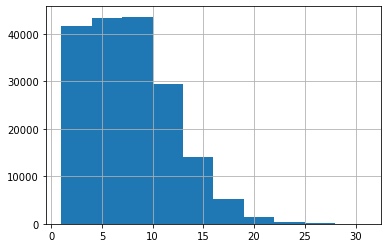

In [38]:
df['count'].hist()
plt.show()

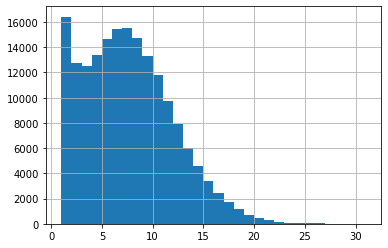

In [39]:
#  1. the interface destribution(<10)
df['count'].hist(bins = 30)
plt.show()

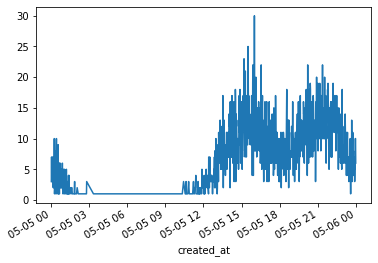

In [41]:
df['2019-5-5']['count'].plot()
plt.show()

In [42]:
# 14:00 : 1st high /20/21:00 2nd high

In [49]:
df2 = df['2019-5-5']
df2 = df2[['count']].resample('1H').mean()
df2

,count
created_at,
2019-05-05 00:00:00,3.949153
2019-05-05 01:00:00,1.906977
2019-05-05 02:00:00,1.428571
2019-05-05 03:00:00,1.000000
2019-05-05 04:00:00,NaN
2019-05-05 05:00:00,NaN
2019-05-05 06:00:00,NaN
2019-05-05 07:00:00,NaN
2019-05-05 08:00:00,NaN


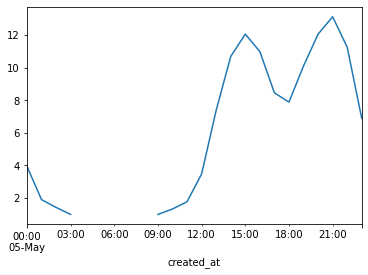

In [48]:
df2['count'].plot()
plt.show()

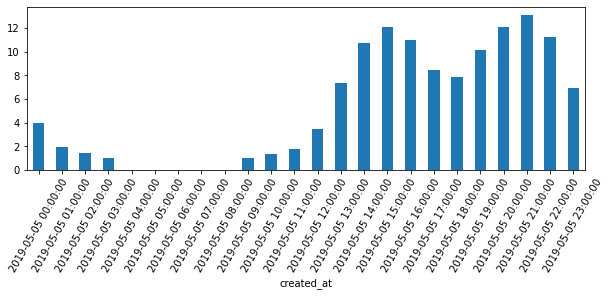

In [52]:
plt.figure(figsize = (10,3))
df2['count'].plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.show()

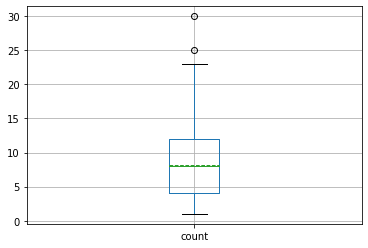

In [55]:
# outliers
df['2019-5-5'][['count']].boxplot(showmeans = True,meanline = True)
plt.show()

In [56]:
df[df["count"]>23]

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2018-11-01 21:13:09,24,4602.03,76.31,391.12,191.0,2018-11-01 21:13:09
2018-11-02 21:34:11,30,4610.15,72.49,463.41,153.0,2018-11-02 21:34:11
2018-11-03 22:42:13,28,4332.65,76.26,263.33,154.0,2018-11-03 22:42:13
2018-11-05 15:49:17,24,3723.64,88.97,280.92,155.0,2018-11-05 15:49:17
2018-11-14 22:30:33,29,5000.14,91.87,305.72,172.0,2018-11-14 22:30:33
...,...,...,...,...,...,...
2019-05-30 20:02:21,24,5038.76,95.34,445.75,209.0,2019-05-30 20:02:21
2019-05-30 20:16:21,26,6415.77,85.31,860.74,246.0,2019-05-30 20:16:21
2019-05-30 21:28:21,25,8782.18,98.49,2549.79,351.0,2019-05-30 21:28:21


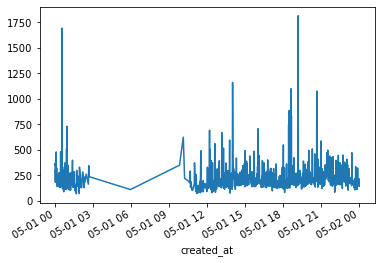

In [57]:
df["2019-5-1"]['res_time_avg'].plot()

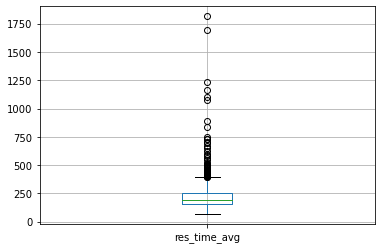

In [58]:
df["2019-5-1"][['res_time_avg']].boxplot()

In [59]:
df2 = df['2019-5-1']
df2[df2["res_time_avg"]>1000]

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2019-05-01 00:34:48,1,1694.47,1694.47,1694.47,1694.0,2019-05-01 00:34:48
2019-05-01 14:00:49,17,19770.18,207.54,2974.52,1162.0,2019-05-01 14:00:49
2019-05-01 18:36:49,8,8799.92,96.59,3233.26,1099.0,2019-05-01 18:36:49
2019-05-01 19:09:49,6,7399.94,307.39,3153.02,1233.0,2019-05-01 19:09:49
2019-05-01 19:10:49,13,23595.60,206.20,4664.84,1815.0,2019-05-01 19:10:49
2019-05-01 20:38:49,15,16169.25,142.47,3624.26,1077.0,2019-05-01 20:38:49


<Figure size 1152x360 with 0 Axes>

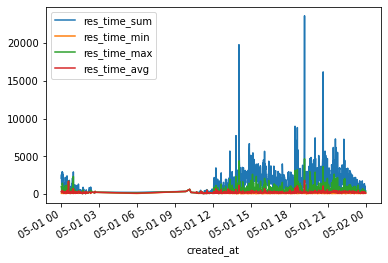

In [63]:
# 2019-05-01 00:34:48	1	1694.47	1694.47	1694.47	1694.0	2019-05-01 00:34:48
# as a outlier
plt.figure(figsize = (16,5))
df['2019-5-1'][['res_time_sum',	'res_time_min',	'res_time_max',	'res_time_avg']].plot()
plt.show()

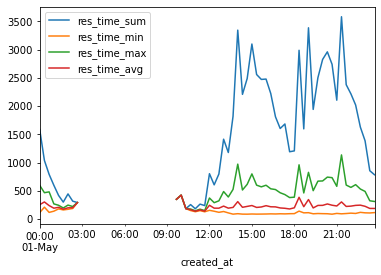

In [65]:
data = df['2019-5-1'].resample('20T').mean()
data[['res_time_sum',	'res_time_min',	'res_time_max',	'res_time_avg']].plot()
plt.show()

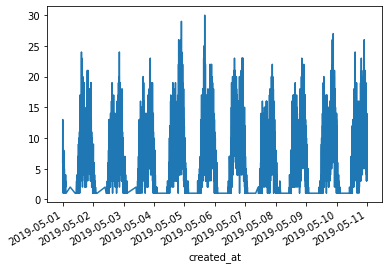

In [66]:
df['2019-5-1' : '2019-5-10']['count'].plot()
plt.show()

In [67]:
df['2019-5-2'].index.weekday
# 0-Monday

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='created_at', length=865)

In [68]:
df['weekday'] = df.index.weekday
df.head()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at,weekday
created_at,,,,,,,
2018-11-01 00:00:07,8,1057.31,88.75,177.72,132.0,2018-11-01 00:00:07,3
2018-11-01 00:01:07,5,749.12,103.79,240.38,149.0,2018-11-01 00:01:07,3
2018-11-01 00:02:07,5,845.84,136.31,225.73,169.0,2018-11-01 00:02:07,3
2018-11-01 00:03:07,9,1305.52,90.12,196.61,145.0,2018-11-01 00:03:07,3
2018-11-01 00:04:07,3,568.89,138.45,232.02,189.0,2018-11-01 00:04:07,3


In [69]:
df['weekend'] = df['weekday'].isin({5, 6})
df.head(5)

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at,weekday,weekend
created_at,,,,,,,,
2018-11-01 00:00:07,8,1057.31,88.75,177.72,132.0,2018-11-01 00:00:07,3,False
2018-11-01 00:01:07,5,749.12,103.79,240.38,149.0,2018-11-01 00:01:07,3,False
2018-11-01 00:02:07,5,845.84,136.31,225.73,169.0,2018-11-01 00:02:07,3,False
2018-11-01 00:03:07,9,1305.52,90.12,196.61,145.0,2018-11-01 00:03:07,3,False
2018-11-01 00:04:07,3,568.89,138.45,232.02,189.0,2018-11-01 00:04:07,3,False


In [70]:
df.groupby('weekend')['count'].mean()

weekend
False    7.016846
True     7.574989
Name: count, dtype: float64

In [71]:

df.groupby(['weekend', df.index.hour])['count'].mean()

weekend  created_at
False    0              3.239120
         1              1.668388
         2              1.162551
         3              1.086705
         4              1.155556
         5              1.136364
         6              1.000000
         7              1.000000
         8              1.000000
         9              1.080000
         10             1.239011
         11             2.031690
         12             4.195845
         13             6.668042
         14             8.260503
         15             8.934448
         16             8.466504
         17             6.784996
         18             6.717731
         19             8.655913
         20            10.536496
         21            10.846906
         22             9.034164
         23             5.946834
True     0              3.467782
         1              1.741849
         2              1.161826
         3              1.050000
         4              1.076923
         5             

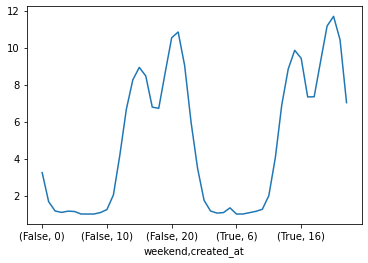

In [72]:

df.groupby(['weekend', df.index.hour])['count'].mean().plot()
plt.show()

In [73]:
df.groupby(['weekend', df.index.hour])['count'].mean().unstack(level = 0)

weekend,False,True
created_at,,
0,3.239120,3.467782
1,1.668388,1.741849
2,1.162551,1.161826
3,1.086705,1.050000
4,1.155556,1.076923
5,1.136364,1.333333
6,1.000000,1.000000
7,1.000000,1.000000
8,1.000000,1.071429


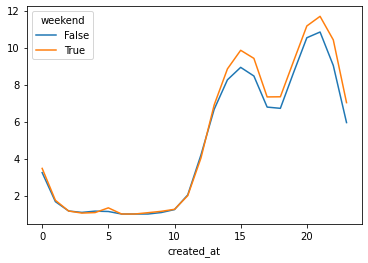

In [74]:
df.groupby(['weekend', df.index.hour])['count'].mean().unstack(level = 0).plot()
plt.show()